<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Uttar%20Pradesh/bjpUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 533 (delta 46), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (533/533), 24.49 MiB | 33.75 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [4]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp UP"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_up.csv',index = False)

Streaming output truncated to the last 5000 lines.
पता चलेगा तो बता देंगे 
Twitter Web App
9
1600
664
2
<--------------------------------------------------->
3388
2020-11-16 06:38:04
1328225807307730945
False
@loverstan1989 @Elizatweetz I am not talking about the past I am talking about the present. I am talking about thier inability to win elections on their own or in an alliance. I am talking about their inability to stop their leaders from switching to the BJP. And their inability to take up Muslim causes.
KoshyG
Thiruvalla, Kerala, India
Twitter for Android
0
214
335
0
<--------------------------------------------------->
3389
2020-11-16 06:36:58
1328225531028860928
False
@ARAND581 @Uppolice @bulandshahrpol Waste government UP in india BJP government
silamba75462242

Twitter Web App
1
1
3
1
<--------------------------------------------------->
3390
2020-11-16 06:36:03
1328225301227216898
False
@KapilSibal @IndianExpress CWC is now a joke... you pat my back and I pat yours. The lead

In [5]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3738 non-null   datetime64[ns]
 1   Tweet_id   3738 non-null   int64         
 2   Verified   3738 non-null   bool          
 3   Tweet      3738 non-null   object        
 4   User       3738 non-null   object        
 5   Location   3738 non-null   object        
 6   Source     3738 non-null   object        
 7   Likes      3738 non-null   int64         
 8   Followers  3738 non-null   int64         
 9   Following  3738 non-null   int64         
 10  Retweets   3738 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 295.8+ KB


In [8]:
df.shape

(3738, 11)

In [9]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [10]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [11]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [12]:
df['Source'].value_counts()

Twitter for Android                 1942
Twitter Web App                     1011
Twitter for iPhone                   548
TweetDeck                             60
Twitter for iPad                      34
WordPress.com                         20
Tweet Suite                           18
Twitter Media Studio - LiveCut        17
Twitter Media Studio                  16
cmssocialservice                      12
IFTTT                                  9
dlvr.it                                8
Hocalwire Social Share                 8
Twitter for Mac                        4
Republicworld                          3
Hootsuite Inc.                         3
Blog2Social APP                        3
SocialFlow                             3
ht-twitter-handler                     2
Rajneeti News                          2
NDTVfeed                               2
HtLucknowApplication                   2
Sputnik v2.0                           1
LinkedIn                               1
Zoho Social     

In [13]:
df['Location'].nunique()

937

In [14]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

3738

In [15]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


3698

In [16]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [17]:
df['Tweet'].duplicated().sum()

40

In [18]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(3698, 11)

In [19]:
df['Tweet'].duplicated().sum()

0

In [20]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [21]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [22]:
df.shape

(3698, 12)

In [23]:
df['Processed_Tweet']

0       #BJP &amp; #AIADMK tie-up to continue for 2021...
1       @my_prema @MyNameIsSenthil @King_Of_Lanka @New...
2       The ground worker in fact is in unenviable pos...
3       @KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...
4       #winner #Manipur Power through knowledge site:...
                              ...                        
3693    Something good coming up in your way Sushil Mo...
3694    @Mr_Siddharth There is a predictable sickening...
3695    @BJP4India @bandisanjay_bjp @JPNadda @byadavbj...
3696    Talks were on that BJP will go for the UP mode...
3697    @ntdgrlnxtdoor BJP had one point in manifesto ...
Name: Processed_Tweet, Length: 3698, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0       #BJP &amp; #AIADMK tie-up to continue for 2021...
1       @my_prema @MyNameIsSenthil @King_Of_Lanka @New...
2       The ground worker in fact is in unenviable pos...
3       @KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...
4       #winner #Manipur Power through knowledge site:...
                              ...                        
3693    Something good coming up in your way Sushil Mo...
3694    @Mr_Siddharth There is a predictable sickening...
3695    @BJP4India @bandisanjay_bjp @JPNadda @byadavbj...
3696    Talks were on that BJP will go for the UP mode...
3697    @ntdgrlnxtdoor BJP had one point in manifesto ...
Name: Processed_Tweet, Length: 3698, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0       #BJP &amp; #AIADMK tie-up to continue for 2021...
1               No proof, not a single case till date,...
2       The ground worker in fact is in unenviable pos...
3           Sir, just ask BJP MP #KishanReddy from Sec...
4       #winner #Manipur Power through knowledge site:...
                              ...                        
3693    Something good coming up in your way Sushil Mo...
3694      There is a predictable sickening chain of ev...
3695                    sir please help me to go back ...
3696    Talks were on that BJP will go for the UP mode...
3697      BJP had one point in manifesto that they wil...
Name: Processed_Tweet, Length: 3698, dtype: object

In [26]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0       #BJP &amp; #AIADMK tie-up to continue for 2021...
1               No proof, not a single case till date,...
2       The ground worker in fact is in unenviable pos...
3           Sir, just ask BJP MP #KishanReddy from Sec...
4       #winner #Manipur Power through knowledge site:...
                              ...                        
3693    Something good coming up in your way Sushil Mo...
3694      There is a predictable sickening chain of ev...
3695                    sir please help me to go back ...
3696    Talks were on that BJP will go for the UP mode...
3697      BJP had one point in manifesto that they wil...
Name: Processed_Tweet, Length: 3698, dtype: object

In [27]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0       BJP &amp; AIADMK tie-up to continue for 2021 T...
1               No proof, not a single case till date,...
2       The ground worker in fact is in unenviable pos...
3           Sir, just ask BJP MP KishanReddy from Secu...
4       winner Manipur Power through knowledge site:Lo...
                              ...                        
3693    Something good coming up in your way Sushil Mo...
3694      There is a predictable sickening chain of ev...
3695                    sir please help me to go back ...
3696    Talks were on that BJP will go for the UP mode...
3697      BJP had one point in manifesto that they wil...
Name: Processed_Tweet, Length: 3698, dtype: object

In [28]:
!pip install tweet-preprocessor

In [29]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0       BJP &amp; AIADMK tie-up to continue for Tamil ...
1       No proof, not a single case till date, but the...
2       The ground worker in fact is in unenviable pos...
3       Sir, just ask BJP MP KishanReddy from Secunder...
4       winner Manipur Power through knowledge site:Lo...
                              ...                        
3693    Something good coming up in your way Sushil Mo...
3694    There is a predictable sickening chain of even...
3695    sir please help me to go back to work and help...
3696    Talks were on that BJP will go for the UP mode...
3697    BJP had one point in manifesto that they will ...
Name: Processed_Tweet, Length: 3698, dtype: object

In [30]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0       BJP  amp  AIADMK tie up to continue for Tamil ...
1       No proof  not a single case till date  but the...
2       The ground worker in fact is in unenviable pos...
3       Sir  just ask BJP MP KishanReddy from Secunder...
4       winner Manipur Power through knowledge site Lo...
                              ...                        
3693    Something good coming up in your way Sushil Mo...
3694    There is a predictable sickening chain of even...
3695    sir please help me to go back to work and help...
3696    Talks were on that BJP will go for the UP mode...
3697    BJP had one point in manifesto that they will ...
Name: Processed_Tweet, Length: 3698, dtype: object

In [31]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0       bjp  amp  aiadmk tie up to continue for tamil ...
1       no proof  not a single case till date  but the...
2       the ground worker in fact is in unenviable pos...
3       sir  just ask bjp mp kishanreddy from secunder...
4       winner manipur power through knowledge site lo...
                              ...                        
3693    something good coming up in your way sushil mo...
3694    there is a predictable sickening chain of even...
3695    sir please help me to go back to work and help...
3696    talks were on that bjp will go for the up mode...
3697    bjp had one point in manifesto that they will ...
Name: Processed_Tweet, Length: 3698, dtype: object

In [32]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'those corrupt  power hungry  selfish  anti hindus are worried that they would loose the power  tamil nadu people deserve better government   so wake up people of tn and vote for bjp to get rid of goons '

In [33]:
df['User'].value_counts()

abhatt2019         42
Tiger_UdaySingh    25
TimesNow           19
IndiaToday         17
atul_kakkar        15
                   ..
NoFilterAbhinav     1
maria0000141        1
Ankita49911987      1
ians_india          1
krisharvind         1
Name: User, Length: 2945, dtype: int64

In [34]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


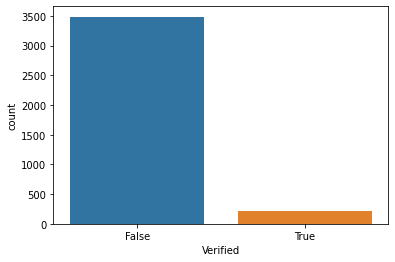

In [35]:
bar = sns.countplot(df['Verified'])

In [36]:
df['Verified'].value_counts()

False    3486
True      212
Name: Verified, dtype: int64

In [37]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

TimesNow        19
IndiaToday      17
ttindia          7
republic         6
TheQuint         5
                ..
rahulkanwal      1
INCIndia         1
Nisith_Malik     1
aroonpurie       1
ABPNews          1
Name: User, Length: 118, dtype: int64

In [38]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 243, 16: 513, 17: 598, 18: 607, 19: 517, 20: 576, 21: 644})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

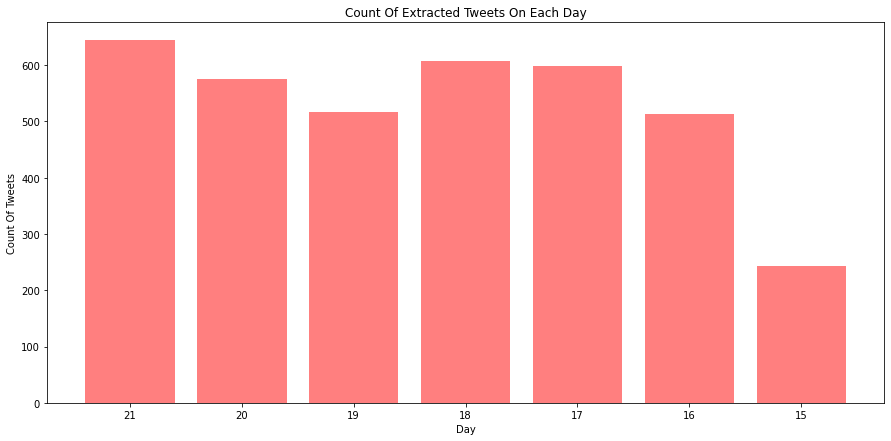

In [39]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [40]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 29,
         1: 50,
         2: 94,
         3: 139,
         4: 182,
         5: 198,
         6: 196,
         7: 192,
         8: 220,
         9: 191,
         10: 189,
         11: 176,
         12: 184,
         13: 242,
         14: 251,
         15: 233,
         16: 242,
         17: 263,
         18: 169,
         19: 98,
         20: 68,
         21: 37,
         22: 29,
         23: 26})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

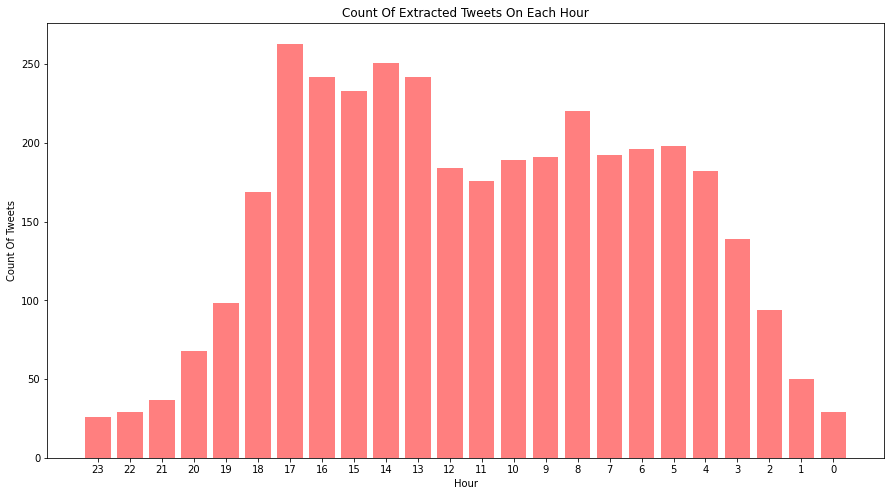

In [41]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [42]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['we', 'when', "mightn't", "she's", 'and', 'which', 'few', "isn't", 'below', 'just', 'each', 'him', 'who', 'being', 'are', 'doing', "you'll", 'a', "needn't", "wasn't", 'down', "shouldn't", 'up', 'during', 'will', "haven't", 'after', 'what', "hadn't", "you've", 'herself', "should've", 'am', 'if', 'wouldn', 'that', 'hasn', 'again', "aren't", 'her', 'for', 'through', 'now', 'the', 'than', 'ma', 'how', 'myself', 'here', "wouldn't", "that'll", 'shan', 'they', 'not', 'i', 'these', 'our', 'had', 'hers', 'he', 'd', 'as', "it's", 'why', 'needn', 'having', 'it', 'mightn', 'more', 'be', 'those', 'once', "don't", 'doesn', 'isn', 'has', 'its', 'at', 'then', 'themselves', 'shouldn', 'against', 'any', 'too', 'but', 'while', 'all', 'same', 'don', 'have', 're', 'of', 'so', 'some', 'll', 've', 'does', 'their', 'do', 'his', "didn't", 'such', "doesn't", 'your', 'where', 'was', 'whom', 'them', 'were', 'above', 'most', 'o', 'about', 'y', 'himself', 'or', 'no', 'itself', 'very', 'my', 'over', 't', 'with', 'o

In [45]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0                bjp aiadmk tie continue tamil nadu polls
1       proof single case till date corrupt guys proof...
2       ground worker fact unenviable position mr siba...
3       sir ask bjp mp kishanreddy secunderabad use te...
4       winner manipur power knowledge site local stat...
                              ...                        
3693    something good coming way sushil modi ji deput...
3694    predictable sickening chain events anti hindu ...
3695    sir please help go back work help family docto...
3696    talks bjp go model tu toh hai chatukaar jp ka ...
3697    bjp one point manifesto pass legislation regar...
Name: Processed_Tweet, Length: 3698, dtype: object

In [46]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0        [bjp, aiadmk, tie, continue, tamil, nadu, polls]
1       [proof, single, case, till, date, corrupt, guy...
2       [ground, worker, fact, unenviable, position, m...
3       [sir, ask, bjp, mp, kishanreddy, secunderabad,...
4       [winner, manipur, power, knowledge, site, loca...
                              ...                        
3693    [something, good, coming, way, sushil, modi, j...
3694    [predictable, sickening, chain, events, anti, ...
3695    [sir, please, help, go, back, work, help, fami...
3696    [talks, bjp, go, model, tu, toh, hai, chatukaa...
3697    [bjp, one, point, manifesto, pass, legislation...
Name: Processed_Tweet, Length: 3698, dtype: object

In [47]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0          [bjp, aiadmk, tie, continu, tamil, nadu, poll]
1       [proof, singl, case, till, date, corrupt, guy,...
2       [ground, worker, fact, unenvi, posit, mr, siba...
3       [sir, ask, bjp, mp, kishanreddi, secunderabad,...
4       [winner, manipur, power, knowledg, site, local...
                              ...                        
3693    [someth, good, come, way, sushil, modi, ji, de...
3694    [predict, sicken, chain, event, anti, hindu, e...
3695    [sir, pleas, help, go, back, work, help, famil...
3696    [talk, bjp, go, model, tu, toh, hai, chatukaar...
3697    [bjp, one, point, manifesto, pass, legisl, reg...
Name: Processed_Tweet, Length: 3698, dtype: object

In [48]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:36:37,1330294072947437568,False,#BJP &amp; #AIADMK tie-up to continue for 2021...,vipulananda,"Colombo, Sri Lanka",Twitter for iPhone,0,2973,5001,0,"[bjp, aiadmk, tie, continu, tamil, nadu, poll]"
1,2020-11-21 23:33:21,1330293250847088646,False,@my_prema @MyNameIsSenthil @King_Of_Lanka @New...,Meyy_Chennai,"Chennai, India",Twitter for Android,1,143,343,1,"[proof, singl, case, till, date, corrupt, guy,..."
2,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,41,5,0,"[ground, worker, fact, unenvi, posit, sibal, s..."
3,2020-11-21 23:25:43,1330291330124312590,False,"@KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...",Hyderabadmpost,Hyderabad,FS Poster,0,38,236,0,"[sir, ask, bjp, kishanreddi, secunderabad, use..."
4,2020-11-21 23:19:03,1330289654227218438,False,#winner #Manipur Power through knowledge site:...,FutureWorldCen,UK,Tweet Suite,0,3685,4791,0,"[winner, manipur, power, knowledg, site, local..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2020-11-15 12:03:45,1327945380315549696,False,Something good coming up in your way Sushil Mo...,pallzie,India,Twitter for Android,4,188,57,0,"[someth, good, come, way, sushil, modi, deputi..."
3694,2020-11-15 11:56:22,1327943523212038147,False,@Mr_Siddharth There is a predictable sickening...,S_K_Raman,India,Twitter for iPhone,0,441,666,0,"[predict, sicken, chain, event, anti, hindu, e..."
3695,2020-11-15 11:56:20,1327943515343527938,False,@BJP4India @bandisanjay_bjp @JPNadda @byadavbj...,KalakotaAbhine1,"Hyderabad, India",Twitter for Android,0,23,48,0,"[sir, pleas, help, back, work, help, famili, d..."
3696,2020-11-15 11:55:46,1327943372183461891,False,Talks were on that BJP will go for the UP mode...,Saysniha,भारत गणराज्य,Twitter for iPhone,4,965,291,0,"[talk, bjp, model, toh, hai, chatukaar, tere, ..."


In [49]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

66874

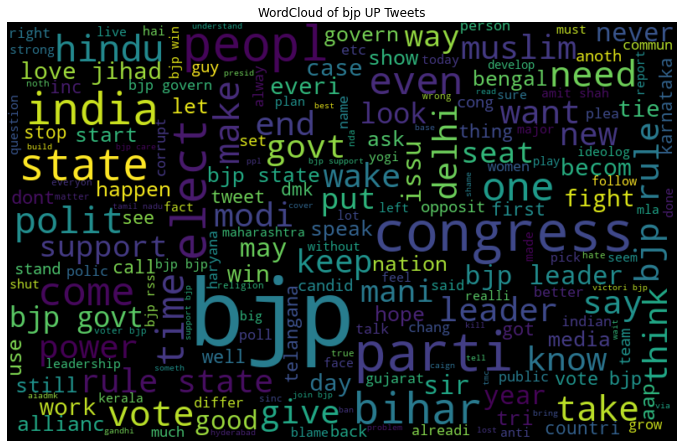

In [50]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp UP Tweets")
plt.show()

In [51]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

3698

In [52]:
len(text)

66874

In [53]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 1698
Negative Tweets: 783
Neutral Tweets 1217


In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [56]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.143,0.857,0.000,-0.5423
2,0.000,0.912,0.088,0.3612
3,0.000,0.861,0.139,0.4404
4,0.000,0.703,0.297,0.5859
...,...,...,...,...
3693,0.000,0.756,0.244,0.4404
3694,0.342,0.658,0.000,-0.6369
3695,0.036,0.647,0.317,0.8617
3696,0.000,1.000,0.000,0.0000


In [57]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.143,0.857,0.000,-0.5423,Negative
2,0.000,0.912,0.088,0.3612,Positive
3,0.000,0.861,0.139,0.4404,Positive
4,0.000,0.703,0.297,0.5859,Positive


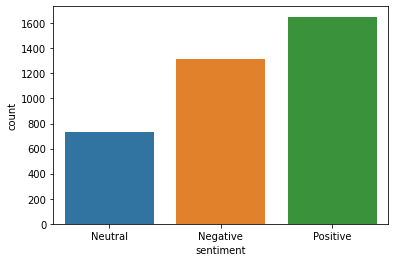

In [58]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [59]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Uttar Pradesh/bjp_up.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

7081

In [60]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [62]:
word_emotion=dict()
for i in range(0,7081):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,155):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

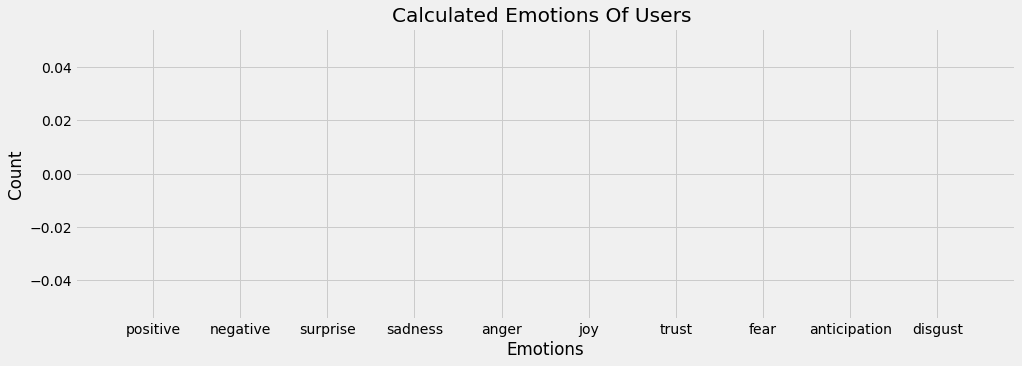

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [65]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [66]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                    1357
India                317
Hyderabad, India      86
Mumbai, India         78
New Delhi, India      77
                    ... 
DC/Cape Town           1
भारत                   1
Hell, MI               1
Puri, India            1
Why?                   1
Name: Location, Length: 931, dtype: int64

In [67]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:36:37,1330294072947437568,False,#BJP &amp; #AIADMK tie-up to continue for 2021...,vipulananda,"Colombo, Sri Lanka",Twitter for iPhone,0,2973,5001,0,"[bjp, aiadmk, tie, continu, tamil, nadu, poll]",Colombo
1,2020-11-21 23:33:21,1330293250847088646,False,@my_prema @MyNameIsSenthil @King_Of_Lanka @New...,Meyy_Chennai,"Chennai, India",Twitter for Android,1,143,343,1,"[proof, singl, case, till, date, corrupt, guy,...",Chennai
2,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,41,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",
3,2020-11-21 23:25:43,1330291330124312590,False,"@KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...",Hyderabadmpost,Hyderabad,FS Poster,0,38,236,0,"[sir, ask, bjp, kishanreddi, secunderabad, use...",Hyderabad
4,2020-11-21 23:19:03,1330289654227218438,False,#winner #Manipur Power through knowledge site:...,FutureWorldCen,UK,Tweet Suite,0,3685,4791,0,"[winner, manipur, power, knowledg, site, local...",UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2020-11-15 12:03:45,1327945380315549696,False,Something good coming up in your way Sushil Mo...,pallzie,India,Twitter for Android,4,188,57,0,"[someth, good, come, way, sushil, modi, deputi...",India
3694,2020-11-15 11:56:22,1327943523212038147,False,@Mr_Siddharth There is a predictable sickening...,S_K_Raman,India,Twitter for iPhone,0,441,666,0,"[predict, sicken, chain, event, anti, hindu, e...",India
3695,2020-11-15 11:56:20,1327943515343527938,False,@BJP4India @bandisanjay_bjp @JPNadda @byadavbj...,KalakotaAbhine1,"Hyderabad, India",Twitter for Android,0,23,48,0,"[sir, pleas, help, back, work, help, famili, d...",Hyderabad
3696,2020-11-15 11:55:46,1327943372183461891,False,Talks were on that BJP will go for the UP mode...,Saysniha,भारत गणराज्य,Twitter for iPhone,4,965,291,0,"[talk, bjp, model, toh, hai, chatukaar, tere, ...",भारत गणराज्य


In [68]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [69]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 23:36:37,1330294072947437568,False,#BJP &amp; #AIADMK tie-up to continue for 2021...,vipulananda,"Colombo, Sri Lanka",Twitter for iPhone,0,2973,5001,0,"[bjp, aiadmk, tie, continu, tamil, nadu, poll]",Colombo,Neutral,21
1,2020-11-21 23:33:21,1330293250847088646,False,@my_prema @MyNameIsSenthil @King_Of_Lanka @New...,Meyy_Chennai,"Chennai, India",Twitter for Android,1,143,343,1,"[proof, singl, case, till, date, corrupt, guy,...",Chennai,Negative,21
2,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,41,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",,Positive,21
3,2020-11-21 23:25:43,1330291330124312590,False,"@KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...",Hyderabadmpost,Hyderabad,FS Poster,0,38,236,0,"[sir, ask, bjp, kishanreddi, secunderabad, use...",Hyderabad,Positive,21
4,2020-11-21 23:19:03,1330289654227218438,False,#winner #Manipur Power through knowledge site:...,FutureWorldCen,UK,Tweet Suite,0,3685,4791,0,"[winner, manipur, power, knowledg, site, local...",UK,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


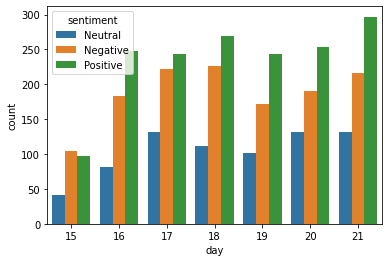

In [70]:
sns.countplot(df['day'],hue = df['sentiment'])

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [72]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:36:37,1330294072947437568,False,#BJP &amp; #AIADMK tie-up to continue for 2021...,vipulananda,"Colombo, Sri Lanka",Twitter for iPhone,0,2973,5001,0,"[bjp, aiadmk, tie, continu, tamil, nadu, poll]",Colombo,Neutral,21,1
1,2020-11-21 23:33:21,1330293250847088646,False,@my_prema @MyNameIsSenthil @King_Of_Lanka @New...,Meyy_Chennai,"Chennai, India",Twitter for Android,1,143,343,1,"[proof, singl, case, till, date, corrupt, guy,...",Chennai,Negative,21,0
2,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,41,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",,Positive,21,2
3,2020-11-21 23:25:43,1330291330124312590,False,"@KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...",Hyderabadmpost,Hyderabad,FS Poster,0,38,236,0,"[sir, ask, bjp, kishanreddi, secunderabad, use...",Hyderabad,Positive,21,2
4,2020-11-21 23:19:03,1330289654227218438,False,#winner #Manipur Power through knowledge site:...,FutureWorldCen,UK,Tweet Suite,0,3685,4791,0,"[winner, manipur, power, knowledg, site, local...",UK,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2020-11-15 12:03:45,1327945380315549696,False,Something good coming up in your way Sushil Mo...,pallzie,India,Twitter for Android,4,188,57,0,"[someth, good, come, way, sushil, modi, deputi...",India,Positive,15,2
3694,2020-11-15 11:56:22,1327943523212038147,False,@Mr_Siddharth There is a predictable sickening...,S_K_Raman,India,Twitter for iPhone,0,441,666,0,"[predict, sicken, chain, event, anti, hindu, e...",India,Negative,15,0
3695,2020-11-15 11:56:20,1327943515343527938,False,@BJP4India @bandisanjay_bjp @JPNadda @byadavbj...,KalakotaAbhine1,"Hyderabad, India",Twitter for Android,0,23,48,0,"[sir, pleas, help, back, work, help, famili, d...",Hyderabad,Positive,15,2
3696,2020-11-15 11:55:46,1327943372183461891,False,Talks were on that BJP will go for the UP mode...,Saysniha,भारत गणराज्य,Twitter for iPhone,4,965,291,0,"[talk, bjp, model, toh, hai, chatukaar, tere, ...",भारत गणराज्य,Neutral,15,1


In [73]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [75]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [76]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [77]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7585585585585586
Precision Score:  0.7585585585585586
Recall Score:  0.7585585585585586
F1 Score:  0.7585585585585586


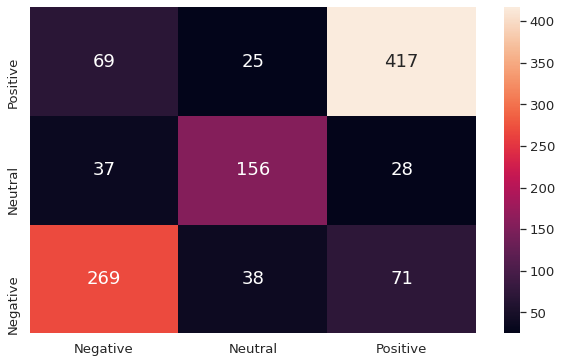

In [78]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [79]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [80]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [83]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5011642872107989
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [84]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.4936936936936937
Precision Score:  0.4936936936936937
Recall Score:  0.4936936936936937
F1 Score:  0.4936936936936937


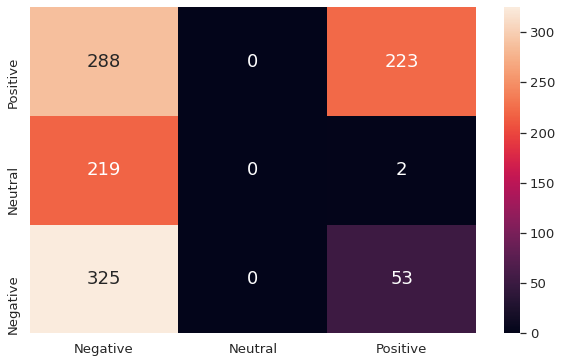

In [85]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [86]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [87]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7738738738738739
Precision Score:  0.7738738738738739
Recall Score:  0.7738738738738739
F1 Score:  0.7738738738738739


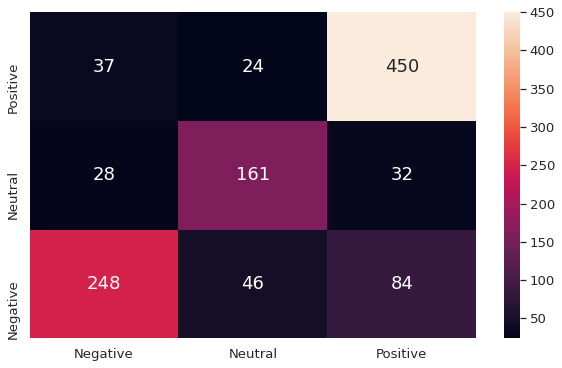

In [88]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [89]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [91]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, max_depth=5, criterion=gini, score=0.535, total=   1.9s
[CV] n_estimators=400, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=400, max_depth=5, criterion=gini, score=0.502, total=   1.8s
[CV] n_estimators=400, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=400, max_depth=5, criterion=gini, score=0.519, total=   1.8s
[CV] n_estimators=400, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=400, max_depth=5, criterion=gini, score=0.516, total=   2.0s
[CV] n_estimators=400, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=400, max_depth=5, criterion=gini, score=0.522, total=   2.0s
[CV] n_estimators=200, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, criterion=gini, score=0.625, total=   1.6s
[CV] n_estimators=200, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.0s remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, criterion=gini, score=0.608, total=   1.6s
[CV] n_estimators=200, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.6s remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, criterion=gini, score=0.604, total=   1.6s
[CV] n_estimators=200, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.2s remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, criterion=gini, score=0.615, total=   1.8s
[CV] n_estimators=200, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.0s remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, criterion=gini, score=0.611, total=   1.8s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.446, total=   4.0s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.448, total=   4.1s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.450, total=   4.0s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.447, total=   4.3s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.455, total=   4.4s
[CV] n_estimators=1000, max_depth=12, criterion=gini .................
[CV]  n_estimators=1000, max_depth=12, criterion=gini, score=0.625, total=   7.1s
[CV] n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


0.620946506052889
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [92]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6423423423423423
Precision Score:  0.6423423423423423
Recall Score:  0.6423423423423423
F1 Score:  0.6423423423423423


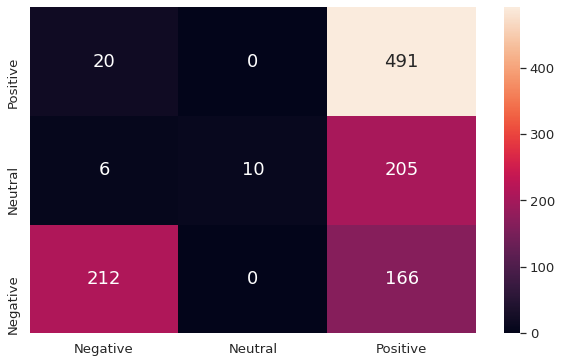

In [93]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [94]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6747747747747748
Precision Score:  0.6747747747747748
Recall Score:  0.6747747747747748
F1 Score:  0.6747747747747748


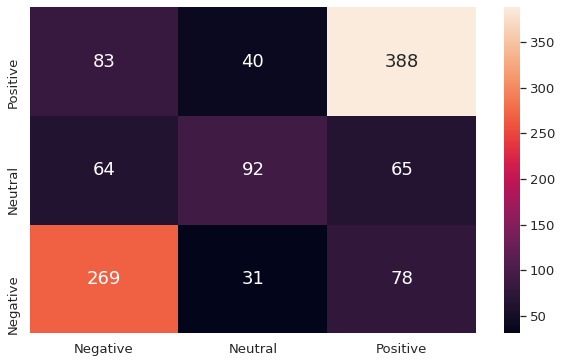

In [95]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [96]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [97]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6808536110861694
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [98]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6747747747747748
Precision Score:  0.6747747747747748
Recall Score:  0.6747747747747748
F1 Score:  0.6747747747747748


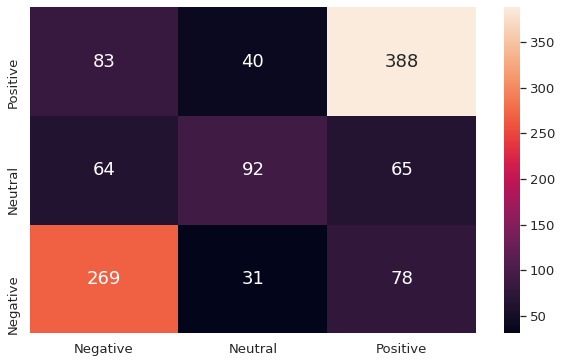

In [99]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

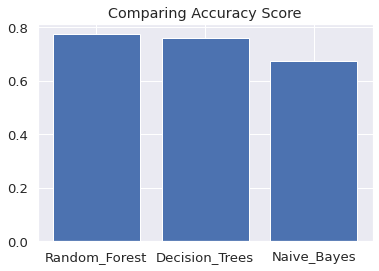

In [100]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

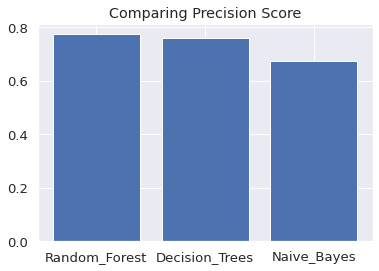

In [101]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

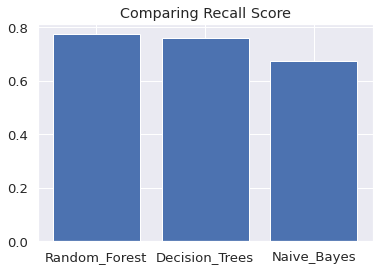

In [102]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

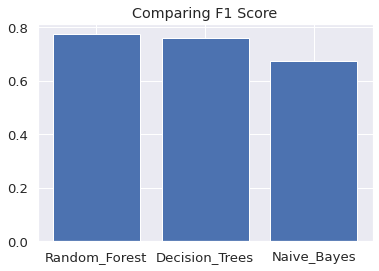

In [104]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()